<a href="https://colab.research.google.com/github/skywalker0803r/Wastewater-Biological-Treatment/blob/main/Observation_time_delay(2023_4_16%E8%A8%8E%E8%AB%96).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import warnings 
import numpy as np
warnings.filterwarnings('ignore')
import pandas as pd
drive.mount('/content/drive')
path = '/content/drive/MyDrive/專案工作承攬契約書_廢水生物處理/20210101-20220831資料(品管數據Event)-20220928.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 對應表

In [ ]:
df = pd.read_excel(path,index_col=0)
對應表 = df.iloc[1:3,:]
對應表.index = ['中文名稱','英文名稱']
對應表.T

,中文名稱,英文名稱
Input,T752入料量,PHL-WS-FI7C01_PV
Output,T752溶氧,PHL-WS-AT7C03_PV
Input.1,T752導電度計,PHL-WS-AT7C02_PV
Input.2,T752溫度,PHL-WS-TT7C09_PV
Input.3,T752 液位,PHL-WS-T752-LEVEL_PV
Input.4,T752曝氣量,PHL-WS-FIT7C04_PV
Output.1,放流水量,PHL-WS-FI7E01_PV
Input.5,T752排泥量,PHL-WS-FI7C05_PV
Input.6,T-752食微比,T-752食微比
Input.7,T751COD濃度,PHL_T751-COD_ppm


In [ ]:
input_cod = 'PHL_T751-pH'
output_cod = 'PHL_A771-pH'

# 檢查資料

In [ ]:
df.columns = 對應表.T['英文名稱'].values.tolist()
df = df.iloc[3:,:]
# to_datetime
df.index = pd.to_datetime(df.index)
# to_numeric
for i in df.columns:
  df[i] = pd.to_numeric(df[i],errors='coerce')
df = df.resample('12H').mean()
df

,PHL-WS-FI7C01_PV,PHL-WS-AT7C03_PV,PHL-WS-AT7C02_PV,PHL-WS-TT7C09_PV,PHL-WS-T752-LEVEL_PV,PHL-WS-FIT7C04_PV,PHL-WS-FI7E01_PV,PHL-WS-FI7C05_PV,T-752食微比,PHL_T751-COD_ppm,...,PHL_A771-SS,PHL_A771-PHL,PHL_S7511-PO4,PHL_S7512-PO4,PHL_S7511-NH3,PHL_S7512-NH3,PHL_T751-pH,PHL_S7512-pH,PHL_A771-pH,PHL_S7512-SS
2021-01-01 00:00:00,30.855939,2.906253,13504.222398,30.806188,82.813893,NaN,165.818889,7.935820,NaN,NaN,...,13.0,NaN,21.600000,2.46,NaN,NaN,7.70,8.1,8.4,29.0
2021-01-01 12:00:00,31.052340,2.590162,13405.193168,30.671744,82.861862,NaN,177.692673,7.905892,NaN,NaN,...,13.0,NaN,21.600000,2.46,20.900000,1.16,7.70,8.1,8.4,29.0
2021-01-02 00:00:00,31.255835,2.591673,13345.359944,30.506641,82.819826,NaN,179.281419,7.986369,NaN,NaN,...,12.0,NaN,21.799999,2.02,NaN,NaN,7.70,8.0,8.3,29.0
2021-01-02 12:00:00,31.054609,2.414819,13274.052019,30.477723,82.837533,NaN,171.557559,7.915682,NaN,NaN,...,12.0,NaN,21.799999,2.02,20.600000,0.25,7.70,8.0,8.3,29.0
2021-01-03 00:00:00,30.843725,2.279833,13290.136925,30.413055,82.843269,NaN,161.569599,7.907438,NaN,NaN,...,14.0,NaN,24.620001,1.96,NaN,NaN,7.80,8.0,8.3,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29 12:00:00,27.162348,4.232158,12952.618692,37.109603,82.559982,1156.101812,147.835191,4.924225,0.065648,1960.0,...,10.0,0.0,24.219999,3.92,19.680000,0.26,8.10,8.2,8.5,NaN
2022-08-30 00:00:00,28.464540,4.122192,13000.846579,37.008526,82.563792,1153.051719,154.251606,4.916978,NaN,1360.0,...,8.0,NaN,24.879999,4.19,NaN,NaN,8.15,8.0,8.5,21.0
2022-08-30 12:00:00,32.609717,3.741517,13047.058388,37.018777,82.587840,1159.875065,154.226574,4.899705,0.067932,1650.0,...,9.0,0.0,24.879999,4.19,19.600000,0.22,8.00,8.3,8.4,NaN
2022-08-31 00:00:00,33.876896,3.430739,13204.453187,37.009072,82.573752,1156.956343,151.900401,4.887941,NaN,1325.0,...,8.0,NaN,23.100000,4.02,NaN,NaN,8.05,8.0,8.5,20.0


# 欄位定義

In [ ]:
x_col = [
    'PHL-WS-AT7C02_PV',#導電度
    'PHL-WS-TT7C09_PV',#溫度
    'PHL-WS-T752-LEVEL_PV',#液位
    'PHL-WS-FIT7C04_PV',#曝氣量
    'PHL-WS-FI7C05_PV',#排泥量
    'PHL_T752-MLSS',#MLSS
    'T-752食微比'#食微比
    ]
y_col = [
    'PHL-WS-FI7E01_PV',#放流水量
    'PHL_A771-pH',#PH
    'PHL_A771-COD_ppm',#COD
    'PHL_A771-SS',#SS
    'PHL_A771-PHL',#Phenol
]

# 檢查缺失值

In [ ]:
#df = df[x_col+y_col]
import requests
url = 'https://gist.githubusercontent.com/skywalker0803r/c92f4651ccbd0640c2a8c97c017092d9/raw/adedbf1159e92402f32b8d961f6db70a1b0c95ad/DataPreprocessingArmory.py'
exec(requests.get(url).text)
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 24 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
PHL-WS-FIT7C04_PV,938,77.1
PHL_A771-PHL,799,65.7
PHL_T752-MLSS,773,63.6
T-752食微比,773,63.6
PHL_S7511-NH3,707,58.1
PHL_S7512-NH3,707,58.1
PHL_S7512-SS,592,48.7
PHL_T751-COD_ppm,326,26.8
PHL_S7512-COD_ppm,326,26.8
PHL_A771-COD_ppm,326,26.8


# 計算採樣頻率

In [ ]:
def get_interval(df,col):
    interval = [t for t,i in enumerate(df[col]) if str(i) != 'nan']
    interval = [ i-j for i,j in zip(interval[1:],interval[:-1])]
    return max(interval,key=interval.count)
temp = pd.DataFrame({'欄位名稱': [i for i in missing_values.index], '採樣頻率': [get_interval(df, i) for i in missing_values.index]})
temp

,欄位名稱,採樣頻率
0,PHL-WS-FIT7C04_PV,1
1,PHL_A771-PHL,2
2,PHL_T752-MLSS,2
3,T-752食微比,2
4,PHL_S7511-NH3,2
5,PHL_S7512-NH3,2
6,PHL_S7512-SS,2
7,PHL_T751-COD_ppm,1
8,PHL_S7512-COD_ppm,1
9,PHL_A771-COD_ppm,1


48*30分鐘 = 1440分鐘 = 24小時 = 一天

16*30分鐘 = 480分鐘 = 8小時

# 視覺化檢查

In [ ]:
# 安裝此套件進行濾波
!pip install --upgrade tsmoothie

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import LowessSmoother
np.random.seed(123)
# 只比較這兩個欄位
titles = [input_cod,output_cod]
df = df.loc[:,titles]
data = df.fillna(method='ffill')
data = data.fillna(method='bfill')
data = data.iloc[100:200] # 半小時一筆一天有24小時相當於48筆我們先以48筆來看,平滑因子不要太高
data = data.T.values
smoother = LowessSmoother(smooth_fraction=0.1,iterations=1)
smoother.smooth(data)

<tsmoothie.smoother.LowessSmoother>

['PHL_T751-pH', 'PHL_A771-pH']


,PHL_T751-pH,PHL_A771-pH
2021-01-01,7.7,8.4


<Figure size 3600x1000 with 0 Axes>

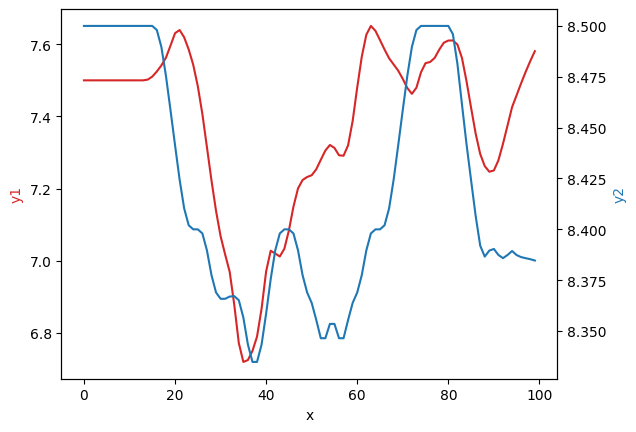

In [ ]:
low, up = smoother.get_intervals('prediction_interval')
plt.figure(figsize=(36,10))
titles = df.columns.tolist()
print(titles)
display(df.head(1))
for i in range(len(titles))[:1]:
    '''
    plt.subplot(4,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='blue')
    plt.plot(smoother.data[i], '.k')
    plt.title(titles[i])
    plt.xlabel('time')
    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)
    plt.subplots_adjust(hspace=0.5,wspace=0.1)
    '''
    # 創建第一個坐標軸，共享x軸
    fig, ax1 = plt.subplots()
    # 繪製y1曲線
    ax1.plot([*range(len(smoother.smooth_data[i]))], smoother.smooth_data[i], color='tab:red')
    # 設定第一個坐標軸的標籤和顏色
    ax1.set_xlabel('x')
    ax1.set_ylabel('y1', color='tab:red')

    # 創建第二個坐標軸，共享x軸
    ax2 = ax1.twinx()

    # 繪製y2曲線
    ax2.plot([*range(len(smoother.smooth_data[i+1]))], smoother.smooth_data[i+1], color='tab:blue')
    # 設定第二個坐標軸的標籤和顏色
    ax2.set_ylabel('y2', color='tab:blue')

    # 顯示圖表
    plt.show()


# 看一週的情況

In [ ]:
def plot_smooth(idx1,idx2,df,smooth_fraction=0.1):
  data = df.fillna(method='ffill')
  data = data.fillna(method='bfill')
  data = data.iloc[idx1:idx2]
  data = data.T.values
  smoother = LowessSmoother(smooth_fraction=smooth_fraction,iterations=1)
  smoother.smooth(data)
  low, up = smoother.get_intervals('prediction_interval')
  plt.figure(figsize=(36,10))
  titles = df.columns.tolist()
  for i in range(len(titles)):
    plt.subplot(4,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='blue')
    plt.plot(smoother.data[i], '.k')
    plt.title(titles[i])
    plt.xlabel('time')
    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)
    plt.subplots_adjust(hspace=0.5,wspace=0.1)

In [ ]:
print(len(df))

1216


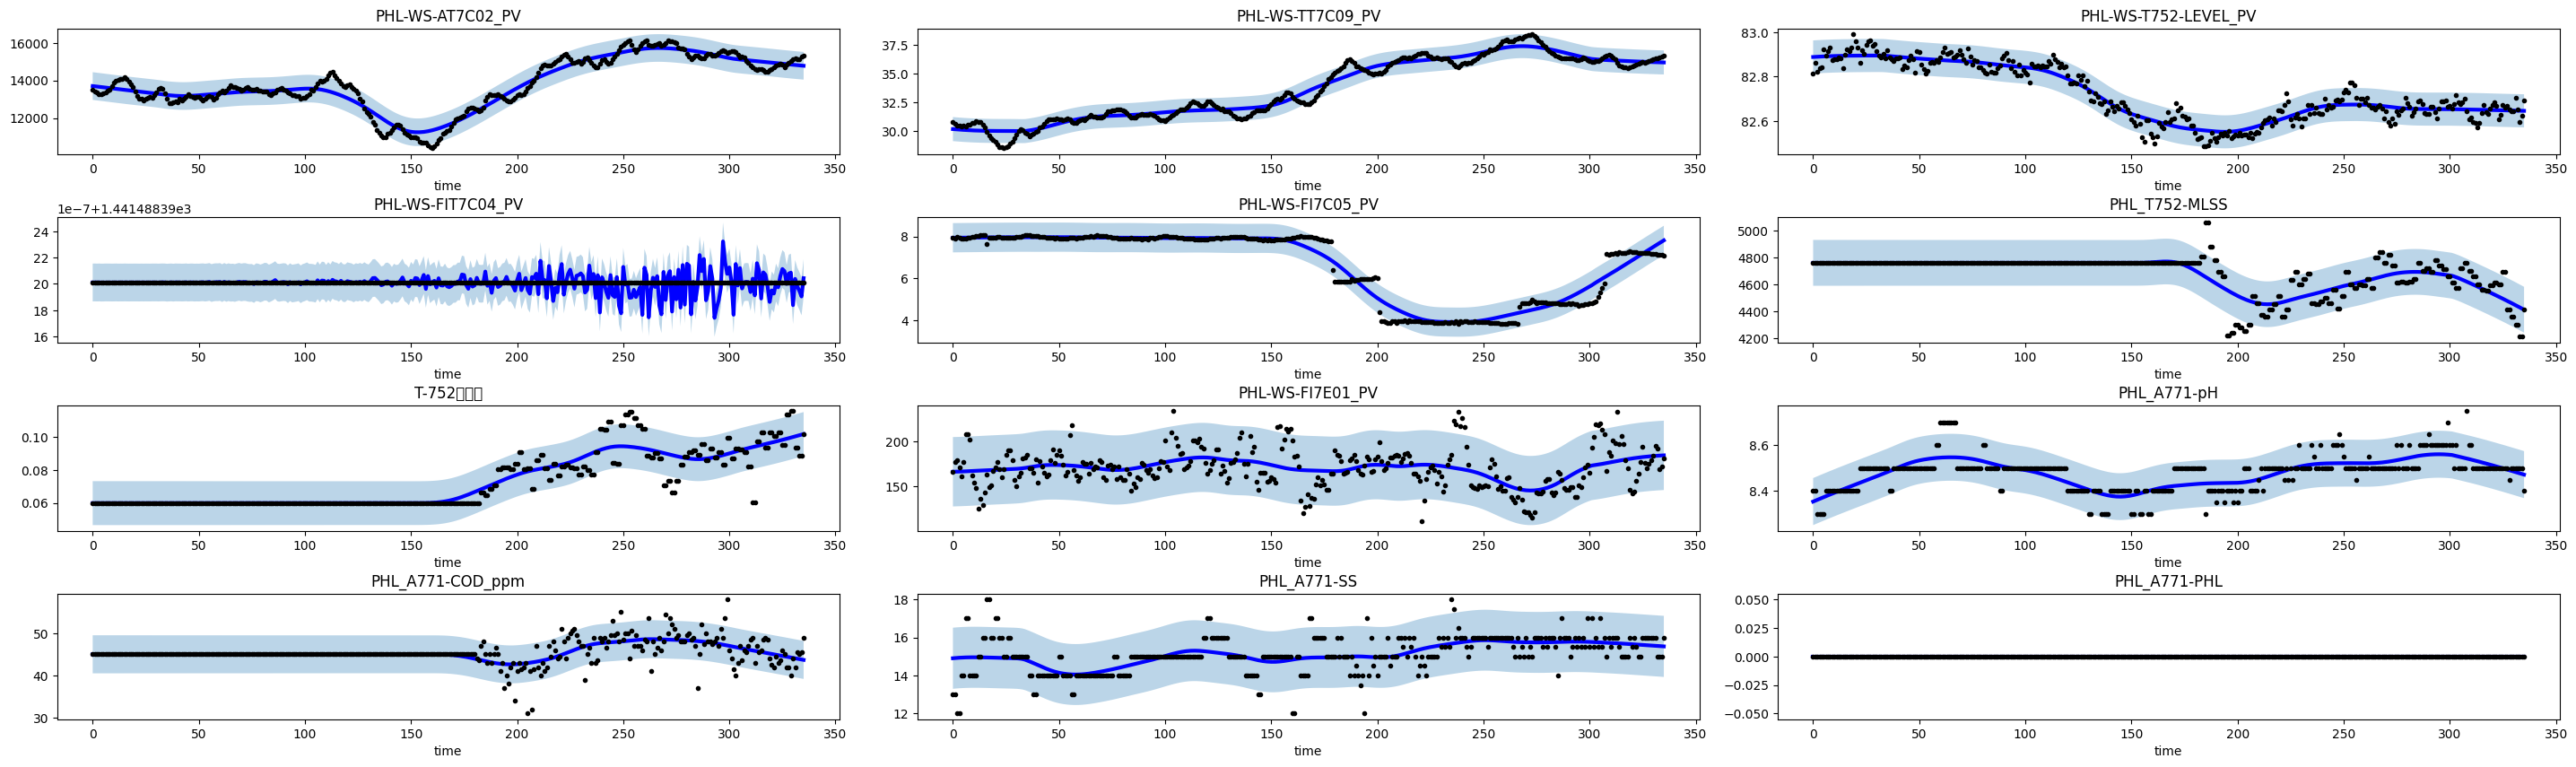

In [ ]:
plot_smooth(0,48*7,df,smooth_fraction=0.2)

# 看一個月的情況

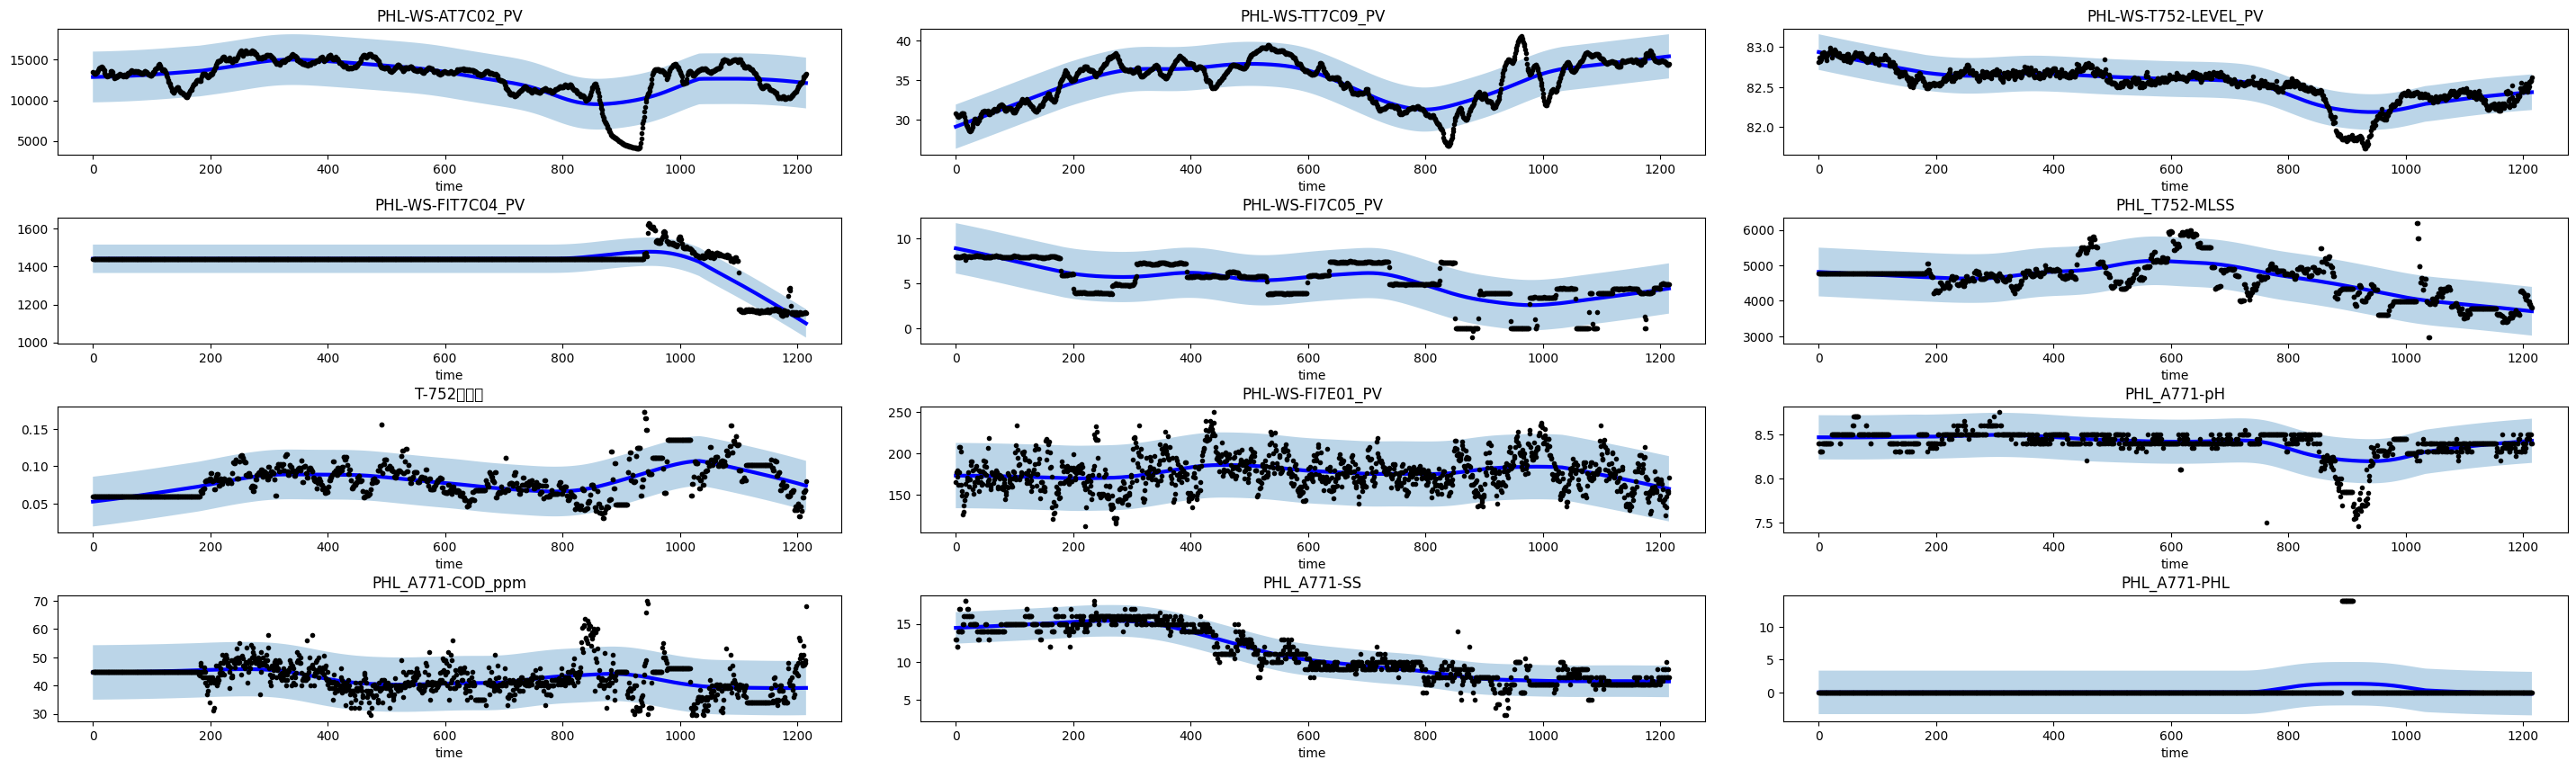

In [ ]:
plot_smooth(0,48*30,df,smooth_fraction=0.3)

# 看三個月的情況

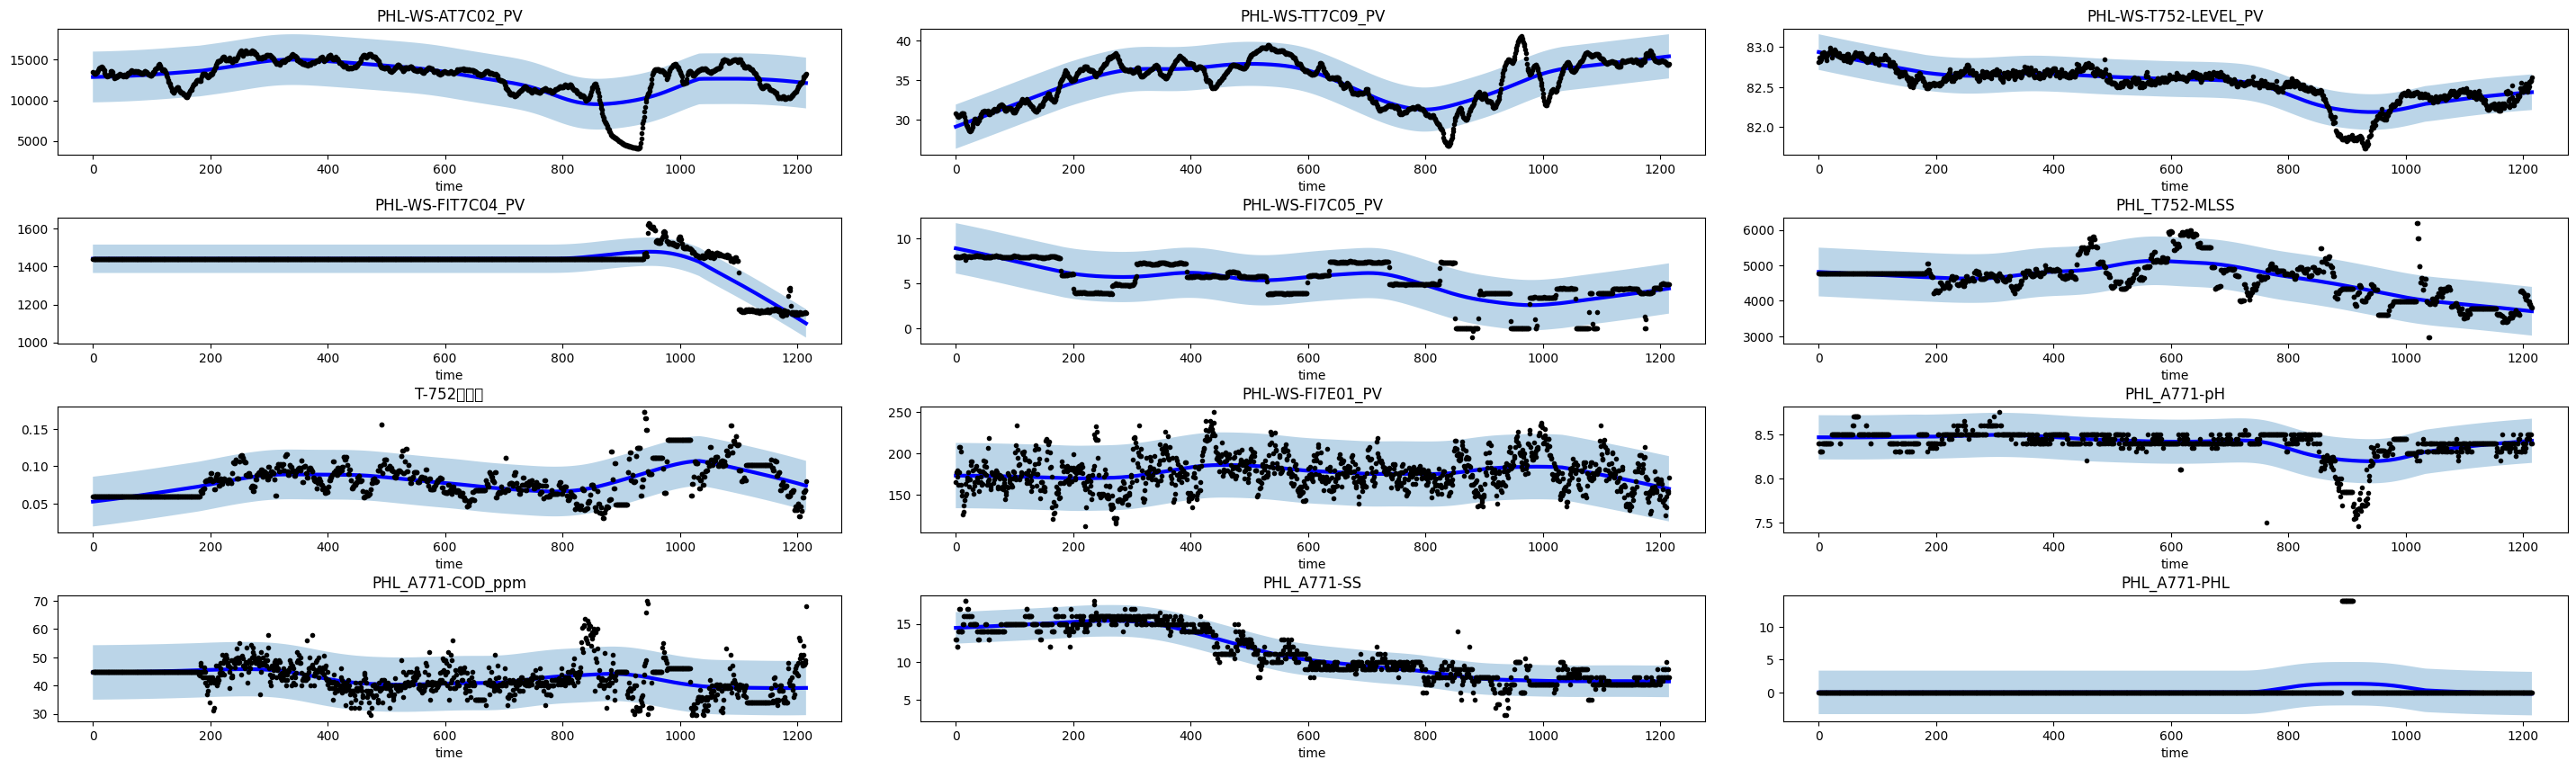

In [ ]:
plot_smooth(0,48*30*3,df,smooth_fraction=0.3)